# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Histogram vs. PCA on the breast cancer dataset

</font>
</div>

# Import modules
<hr style = "border:2px solid black" ></hr>

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
rcParams['font.size'] = 15
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

# Import dataset
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- This dataset has 30 features and looking at the pair plot would results in two many scater plors to be analysed.
- The histogram may come to our rescuse and provide some info on the dataset.

</font>
</div>

In [18]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

(426, 30)
(143, 30)


# Helper function
<hr style = "border:2px solid black" ></hr>

In [29]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

# Histogram dataset
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- The histogram gives us some idea of how each feature is 
distributed across the two classes, and allows us to venture a guess as to which features are better at 
distinguishing malignant and benign samples. 

- For example, the feature “smoothness error” seems quite uninformative,
because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because
the histo‐ grams are quite disjoint.

- However, this plot doesn’t show us anything about the interactions between variables and how these relate to the 
classes. Using PCA, we can capture the main interactions and get a slightly more complete picture. We can find the 
first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot.

</font>
</div>

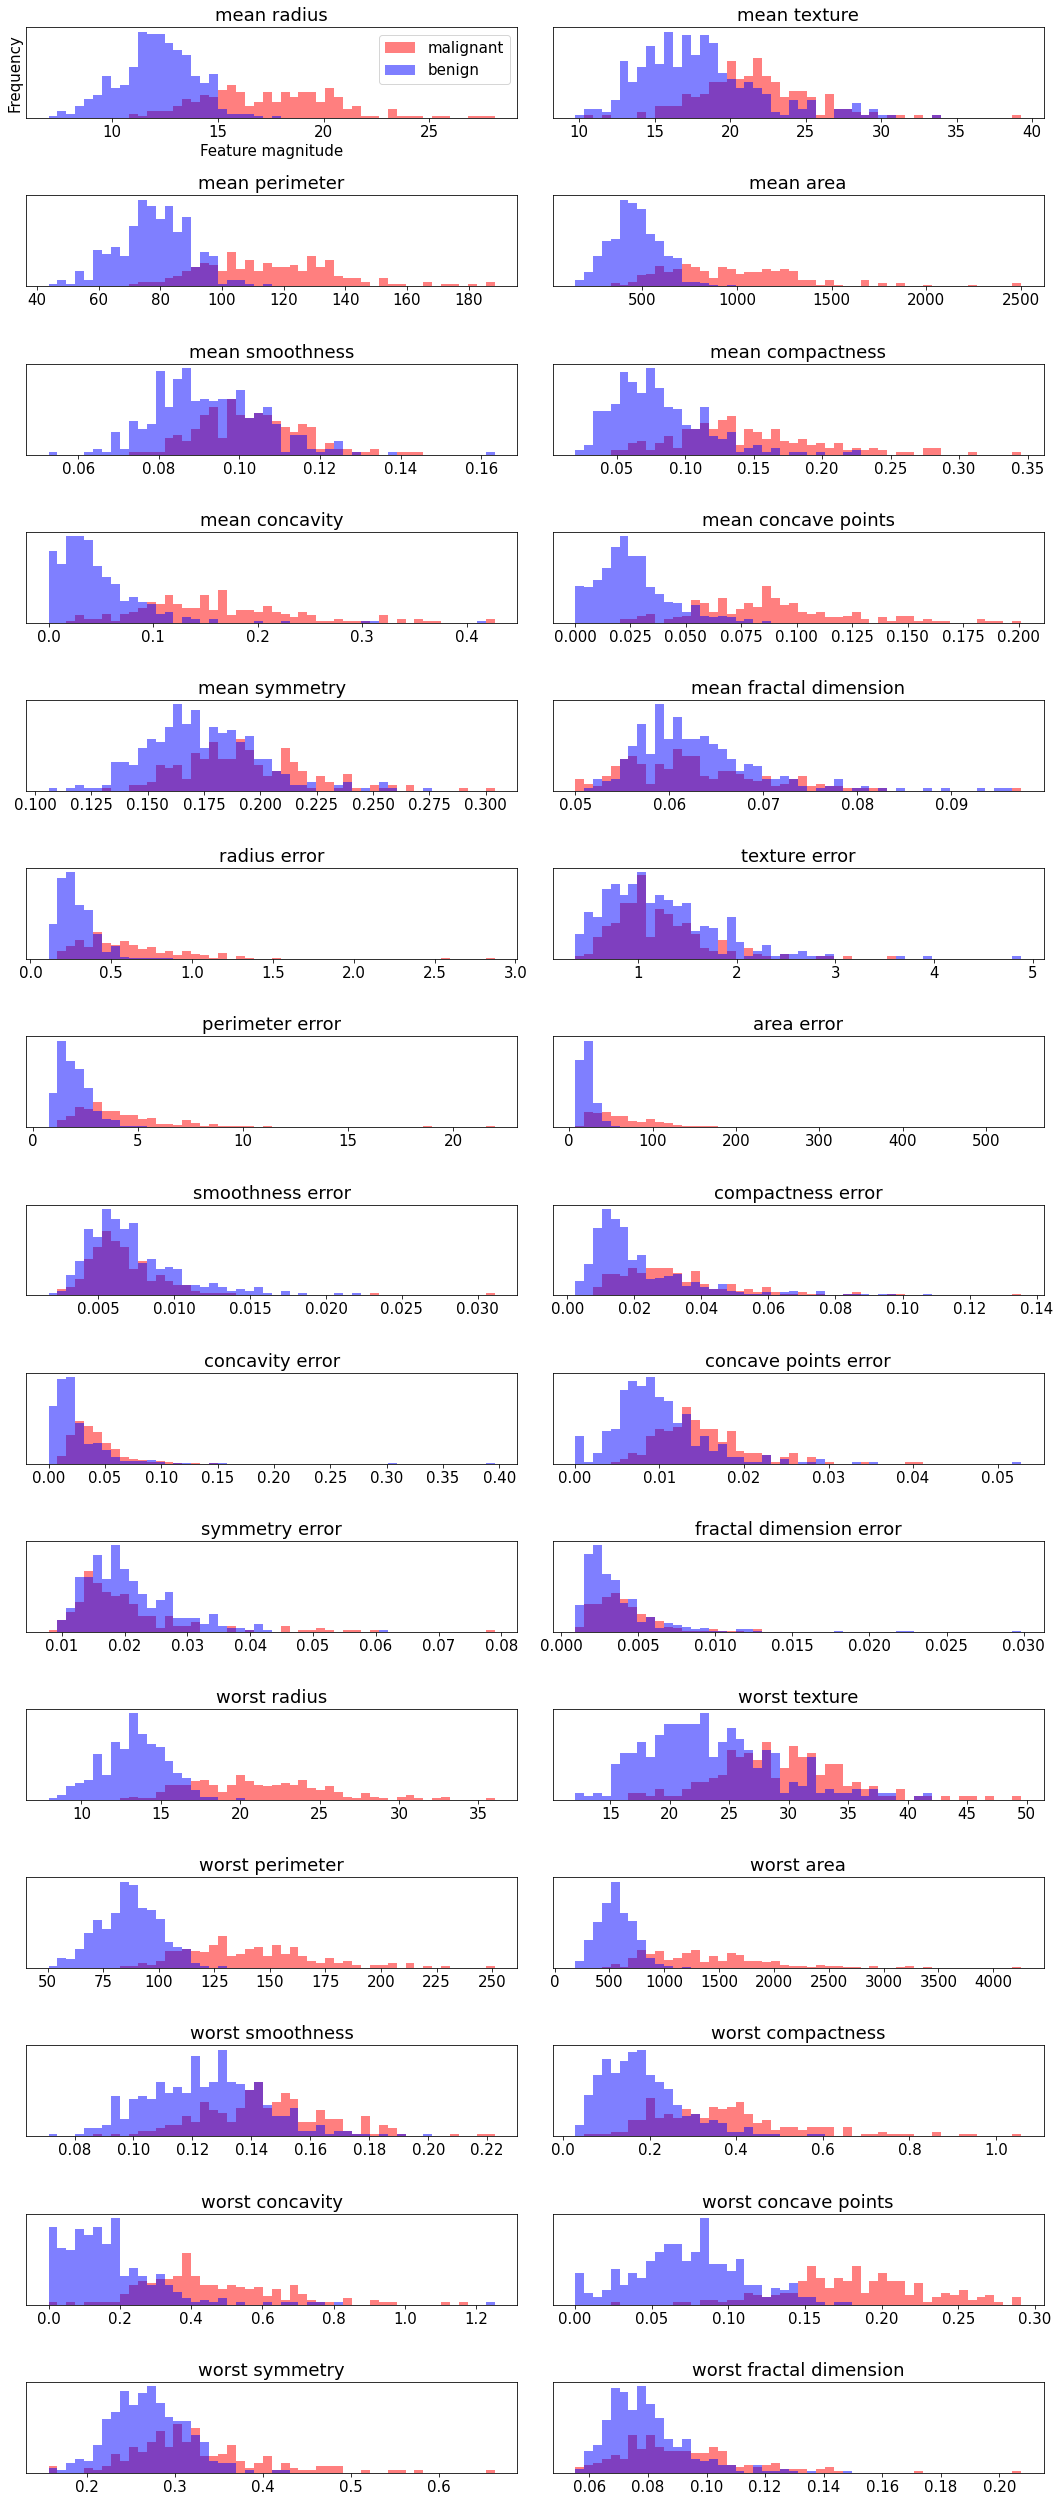

In [20]:
fig, axes = plt.subplots(15, 2, figsize=(15, 35))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color="r", alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color="b", alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

# PCA
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Before we apply PCA, we scale our data so that each feature has **unit variance** using.

- **Why standardise the features?** 

- **Recall** that PCA is essentially a variance maximizing exercise. It projects your original data onto directions which maximize the variance. 
    
- If some variables have a large variance and some small, PCA (maximizing variance) will load on the large variances. For example if you change one variable from km to cm (increasing its variance), it may go from having little impact to dominating the first principle component. If you want your PCA to be independent of such rescaling, standardizing the variables will do that.

- **Confusion point: Normalisation or standardisation?** Watch out: normalize in statistics sometimes carries the meaning of transform to be closer to a normal or Gaussian distribution. In this case, PCA and how it uses variance, it is better to talk of *standardising* when what is meant is scaling by (value - mean)/SD (or some other specified standardisation). 

</font>
</div>

In [25]:
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

<div class="alert alert-info">
<font color=black>

- Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. 

- We instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation
and dimensionality reduction by calling transform. 

- By default, PCA only rotates (and shifts) the data, but keeps all principal components.

</font>
</div>

In [26]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

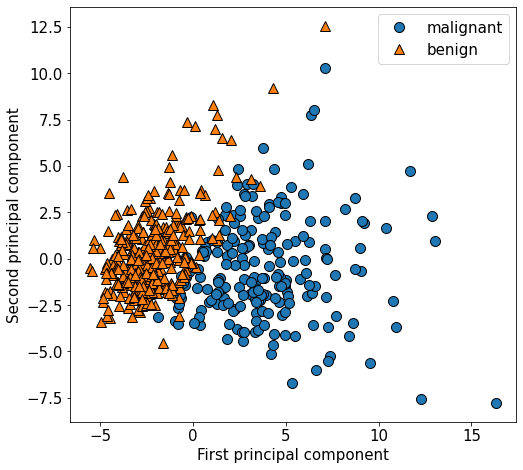

In [32]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

<div class="alert alert-info">
<font color=black>

- The two classes separate quite well in this two-dimensional space. 

- This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes.

- We can also see that the malignant (red) points are less spread out than the benign (blue) points.

</font>
</div>

# Downside of PCA
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- A downside of PCA is that the two axes in the plot are often not very easy to interpret. 

- The principal components correspond to directions in the original data, so they are combinations of the original features. However, these  combinations are usually very complex, as we’ll see shortly. 

- The principal components themselves are stored in the `components_` attribute of the PCA object during fitting

</font>
</div>

In [33]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


<div class="alert alert-info">
<font color=black>

- Each row in components_ corresponds to one principal component, and they are sorted by their importance (the 
first principal component comes first, etc.). 

- The columns correspond to the original features attribute of the PCA in this example, “mean radius,” “mean texture,” and so on. Let’s have a look at the content of components_:

</font>
</div>

In [34]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

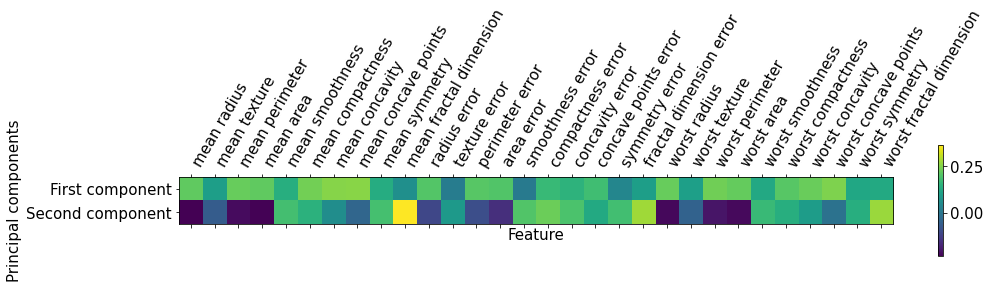

In [35]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

<div class="alert alert-info">
<font color=black>

- You can see that in the first component, all features have the same sign (it’s negative, but as we mentioned 
earlier, it doesn’t matter which direction the arrow points in). 
- That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. The second component 
has mixed signs, and both of the components involve all of the 30 features.
- This mixing of all features is what makes explaining the axes in the previous figure **tricky**.

</font>
</div>

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/amueller/introduction_to_ml_with_python
- Guido, Sarah, and Andreas Müller. Introduction to machine learning with python. Vol. 282. O'Reilly Media, 2016.
- [Standardise/normalise before using PCA](https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca)
- [A Step By Step Implementation of Principal Component Analysis](https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598)

</font>
</div>